In [3]:
import numpy as np
import pandas as pd
import nltk

In [4]:
modi = pd.read_csv('narendramodi_tweets.csv')

In [5]:
modi.head()

,id,retweets_count,favorite_count,created_at,text,lang,retweeted,followers_count,friends_count,hashtags_count,description,location,background_image_url,source
0,8.263846e+17,1406.0,4903.0,2017-01-31 11:00:07,The President's address wonderfully encapsulat...,en,False,26809964.0,1641.0,1.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
1,8.263843e+17,907.0,2877.0,2017-01-31 10:59:12,Rashtrapati Ji's address to both Houses of Par...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
2,8.263827e+17,694.0,0.0,2017-01-31 10:52:33,RT @PMOIndia: Empowering the marginalised. htt...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
3,8.263826e+17,666.0,0.0,2017-01-31 10:52:22,RT @PMOIndia: Commitment to welfare of farmers...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client
4,8.263826e+17,716.0,0.0,2017-01-31 10:52:16,RT @PMOIndia: Improving the quality of life fo...,en,False,26809964.0,1641.0,0.0,Prime Minister of India,India,http://pbs.twimg.com/profile_background_images...,Twitter Web Client


In [7]:
modi.shape


(3220, 14)

In [8]:
modi.dtypes

id                      float64
retweets_count          float64
favorite_count          float64
created_at               object
text                     object
lang                     object
retweeted                  bool
followers_count         float64
friends_count           float64
hashtags_count          float64
description              object
location                 object
background_image_url     object
source                   object
dtype: object

In [9]:
modi['date'] = pd.to_datetime(modi['created_at'],format = '%Y-%m-%d %H:%M:%S') #coverting object(created_at col) to datetime datatype

In [10]:
modi['date'].head()

0   2017-01-31 11:00:07
1   2017-01-31 10:59:12
2   2017-01-31 10:52:33
3   2017-01-31 10:52:22
4   2017-01-31 10:52:16
Name: date, dtype: datetime64[ns]

TIME PERIOD 

In [13]:
modi['date'].min(),modi['date'].max()

(Timestamp('2016-03-09 12:22:10'), Timestamp('2017-01-31 11:00:07'))

install package wordcloud

In [14]:
!pip install wordcloud

### Pictorial Representation of bag of word analysis

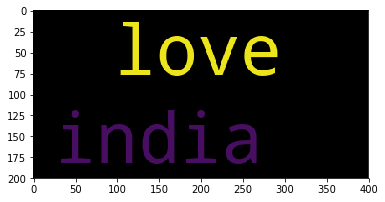

In [247]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud().generate('i love india')  #Bag of word analysis
plt.imshow(wc)  #image show commmand

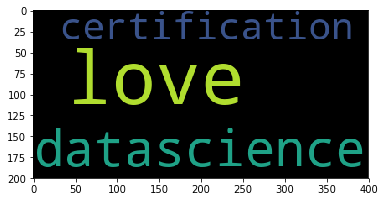

In [19]:
wc = WordCloud().generate('i love datascience certification')  #Bag of word analysis
plt.imshow(wc)  #image show commmand

### word count

In [20]:
' '.join(['i','love','india'])

'i love india'

In [21]:
''.join(['i','love','india'])

'iloveindia'

In [22]:
' '.join(modi['text'])

'The President\'s address wonderfully encapsulated India\'s strengths, aspirations, potential &amp; the efforts towards #TransformingIndia. Rashtrapati Ji\'s address to both Houses of Parliament was in-depth &amp; extensive. Do hear. https://t.co/rdKQtjgNNx @RashtrapatiBhvn RT @PMOIndia: Empowering the marginalised. https://t.co/wwsqgW94Dk RT @PMOIndia: Commitment to welfare of farmers. https://t.co/P7AAfRfmrC RT @PMOIndia: Improving the quality of life for the poor. https://t.co/8ugm25VK2Z RT @PMOIndia: Financial inclusion for poverty alleviation. https://t.co/5xT2ZyhHTE RT @RashtrapatiBhvn: The four-decade old demand of one-rank-one-pension (OROP) of our Armed Forces veterans has been fulfilled #PresidentMu… RT @RashtrapatiBhvn: My Government has taken bold decisions in the interest of the poor #PresidentMukherjee RT @RashtrapatiBhvn: Under its proactive "Act East" policy, my govt is focussing on reducing isolation of the Eastern region &amp; North-east… RT @RashtrapatiBhvn: Through 

Pictorial Representation of bag of word analysis (word count of the words used by modi mostly)

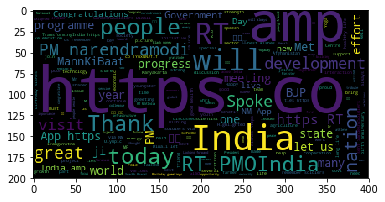

In [25]:
wc = WordCloud().generate(' '.join(modi['text']))  
plt.imshow(wc)    

# TEXT TRANSFORMATION OR TEXT CLEANING
### -> covert every character to lowercase
### -> Remove spl. characters,numbers
### -> Remove Common stop words (Ex:-of,the,is,was) 
### -> Remove junk words (Ex:- amp,rt,https)
### -> Identify root of the word(Stemming)


covert every character to lowercase

In [97]:
docs = modi['text'].str.lower()
docs.head()

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

## Regular Expression

Remove spl characters and numbers

In [98]:
docs.str.replace('the','-').head()  #Replace 'the' with '-'


0    - president's address wonderfully encapsulated...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering - marginalised. https...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving - quality of life for ...
Name: text, dtype: object

In [99]:
docs.str.replace('rt','').head()  #Remove rt

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2     @pmoindia: empowering the marginalised. https...
3     @pmoindia: commitment to welfare of farmers. ...
4     @pmoindia: improving the quality of life for ...
Name: text, dtype: object

In [100]:
docs.str.replace('[a-z]','').head()   #Remove all alphabets

0           '    ' , ,  &;    #.
1     '        - &; .  . ://./ @
2                 @:   . ://./94
3                @:     . ://./7
4          @:        . ://./8252
Name: text, dtype: object

In [101]:
docs.str.replace('[0-9]','').head()   #Remove all numbers

0    the president's address wonderfully encapsulat...
1    rashtrapati ji's address to both houses of par...
2    rt @pmoindia: empowering the marginalised. htt...
3    rt @pmoindia: commitment to welfare of farmers...
4    rt @pmoindia: improving the quality of life fo...
Name: text, dtype: object

In [102]:
docs.str.replace('[^a-z]','').head() #retain all alphabets 

0    thepresidentsaddresswonderfullyencapsulatedind...
1    rashtrapatijisaddresstobothhousesofparliamentw...
2    rtpmoindiaempoweringthemarginalisedhttpstcowws...
3    rtpmoindiacommitmenttowelfareoffarmershttpstco...
4    rtpmoindiaimprovingthequalityoflifeforthepoorh...
Name: text, dtype: object

In [103]:
docs.str.replace('[^a-z ]','').head()   #retain all alphabets , spaces

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt pmoindia empowering the marginalised httpst...
3    rt pmoindia commitment to welfare of farmers h...
4    rt pmoindia improving the quality of life for ...
Name: text, dtype: object

In [104]:
docs.str.replace('[^a-z #@]','').head() #retain all alphabets , spaces , #@ symbol

0    the presidents address wonderfully encapsulate...
1    rashtrapati jis address to both houses of parl...
2    rt @pmoindia empowering the marginalised https...
3    rt @pmoindia commitment to welfare of farmers ...
4    rt @pmoindia improving the quality of life for...
Name: text, dtype: object

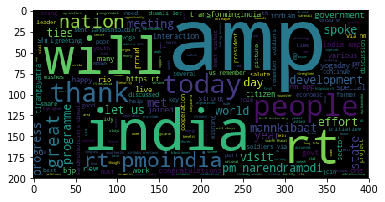

In [105]:
docs = docs.str.replace('[^a-z #@]','')
wc = WordCloud().generate(' '.join(docs))
plt.imshow(wc)

Remove Common stop words (Ex:-of,the,is,was)  and junk words(Ex:- amp,rt,https)

In [106]:
nltk.download('stopwords')
#nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASHISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [107]:
nltk.corpus.stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [108]:
stop_words = nltk.corpus.stopwords.words('english')
junk_words = ['amp','rt','https','will']
#len(stop_words)

In [109]:
stop_words.extend(junk_words)  #joining two lists

In [110]:
len(stop_words)

183

Identify root of the word(Stemming)

In [111]:
stemmer = nltk.PorterStemmer()
stemmer.stem('playing')
stemmer.stem('played')
stemmer.stem('plays')

stemmer.stem('president')

'presid'

In [113]:
def clean_text(row_text):
    #print(type(row_text))
    row_words = row_text.split(' ')
    #print(row_words)
    row_words = [stemmer.stem(word) for word in row_words if word not in stop_words]
    #print(row_words)
    #print('-----')
    return ' '.join(row_words)
    
docs_clean = docs.apply(lambda v: clean_text(v))
docs_clean.head()

0    presid address wonder encapsul india strength ...
1    rashtrapati ji address hous parliament indepth...
2          @pmoindia empow marginalis httpstcowwsqgwdk
3     @pmoindia commit welfar farmer httpstcopaafrfmrc
4    @pmoindia improv qualiti life poor httpstcougmvkz
Name: text, dtype: object

# PROPER BAG OF WORD ANALYSIS

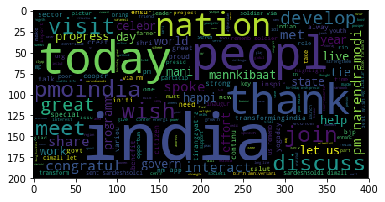

In [114]:
wc = WordCloud().generate(' '.join(docs_clean))  #Word count of cleaned data(docs_clean)
plt.imshow(wc)

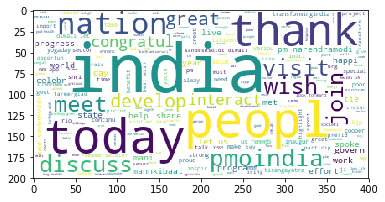

In [116]:
wc = WordCloud(background_color="White").generate(' '.join(docs_clean))  #Word count of cleaned data(docs_clean)
plt.imshow(wc)

(-0.5, 399.5, 199.5, -0.5)

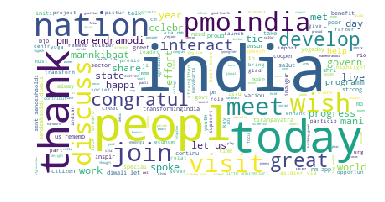

In [117]:
wc = WordCloud(background_color="White").generate(' '.join(docs_clean))  #Word count of cleaned data(docs_clean)
plt.imshow(wc)
plt.axis("off")

## Hashtag Analysis

In [120]:
hashtags = []

for row in docs_clean:
    row_words = row.split(' ')
    row_hashtags = [word for word in row_words \
                    if word.startswith('#')]
    hashtags.extend(row_hashtags)
hashtags[:50]

['#transformingindia',
 '#presidentmu',
 '#presidentmukherje',
 '#pr',
 '#presidentmukherje',
 '#presidentmukherje',
 '#presidentmukherje',
 '#',
 '#presidentmukherje',
 '#presidentmukherje',
 '#presidentmukherje',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#stressfreeexam',
 '#mannkibaat',
 '#republicday',
 '#republicday',
 '#republicday',
 '#republicday',
 '#republicday',
 '#',
 '#mannkibaat',
 '#mannkibaat',
 '#mannkibaat',
 '#pbd',
 '#pbd',
 '#pbd',
 '#thprakashparv',
 '#thprakashparv',
 '#thprakashparv',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#mannkibaat',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#digidhanmela',
 '#demonetis',
 '#digitalpay',
 '#digitalpay',
 '#digitalpay',
 '#digidhanmela']

In [122]:
len(hashtags)

849

In [123]:
len(set(hashtags))

218

In [124]:
len(np.unique(hashtags))

218

In [128]:
freq_hashtags = pd.Series(hashtags).value_counts()  #count of hashtag analysis
freq_hashtags.head(50)

#sandeshsoldi            110
#mannkibaat               92
#tirangayatra             84
#yogaday                  53
#transformingindia        52
#idi                      44
#mycleanindia             24
#rio                      19
#                         14
#digidhanmela             11
#happydiwali               9
#iyd                       9
#presidentmukherje         9
#yoga                      9
#paralymp                  9
#swachhbharat              8
#diwali                    8
#internationalyogaday      7
#digitalpay                5
#republicday               5
#narendramodi              4
#yogasdg                   4
#gandhijayanti             4
#ipaydigit                 4
#swachhbharatabhiyan       4
#shivsmarak                4
#happydeepavali            3
#yogaineu                  3
#worldculturefestiv        3
#incredibleindia           3
#selfi                     3
#sandesh                   3
#thprakashparv             3
#suryanamaskara            3
#worldwaterday

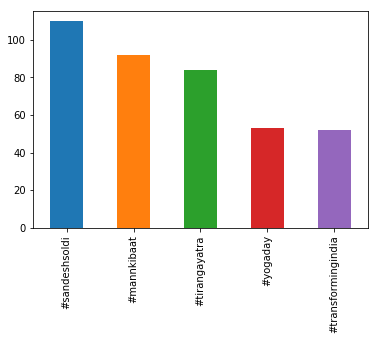

In [152]:
freq_hashtags.head().plot(kind = 'bar') #visualization of hashtag analysis

### Frequency of hashtag #sandseshsoldi across months

In [137]:
modi['year_month'] = modi['date'].dt.strftime('%Y-%m')   #strftime=string from time, .dt=date operations
modi[['date','year_month']].head()

,date,year_month
0,2017-01-31 11:00:07,2017-01
1,2017-01-31 10:59:12,2017-01
2,2017-01-31 10:52:33,2017-01
3,2017-01-31 10:52:22,2017-01
4,2017-01-31 10:52:16,2017-01


In [138]:
modi['year_month'] = modi['date'].dt.strftime('%Y-%B')   #strftime=string from time, .dt=date operations
modi[['date','year_month']].head()

,date,year_month
0,2017-01-31 11:00:07,2017-January
1,2017-01-31 10:59:12,2017-January
2,2017-01-31 10:52:33,2017-January
3,2017-01-31 10:52:22,2017-January
4,2017-01-31 10:52:16,2017-January


In [149]:
#modi['sandeshsoldi'] = modi['text'].apply(lambda v: 1 if 'sandeshsoldi' in v else 0)
#modi['sandeshsoldi'].value_counts()

In [150]:
modi['sandeshsoldi'] = docs_clean.apply(lambda v: \
                                         1 if 'sandeshsoldi' in v \
                                         else 0)
modi['sandeshsoldi'].value_counts()

0    3105
1     115
Name: sandeshsoldi, dtype: int64

Text(0.5,1,'Trending Analysis on hashtag sandeshsoldi')

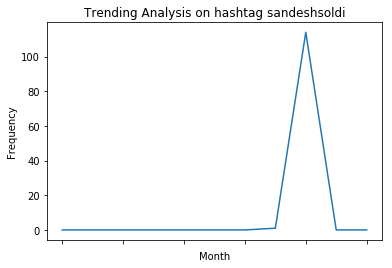

In [156]:
modi.groupby('year_month')['sandeshsoldi'].sum().plot.line()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Trending Analysis on hashtag sandeshsoldi')


Text(0.5,1,'Bar analysis on hashtag sansehsoldi')

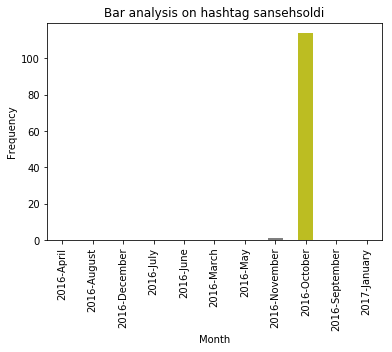

In [157]:
modi.groupby('year_month')['sandeshsoldi'].sum().plot.bar()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Bar analysis on hashtag sansehsoldi')


### Frequency of hashtag #mannkibaat across months

In [159]:
modi['year_month'] = modi['date'].dt.strftime('%Y-%m')   #strftime=string from time, .dt=date operations
modi[['date','year_month']].head()

,date,year_month
0,2017-01-31 11:00:07,2017-01
1,2017-01-31 10:59:12,2017-01
2,2017-01-31 10:52:33,2017-01
3,2017-01-31 10:52:22,2017-01
4,2017-01-31 10:52:16,2017-01


In [160]:
modi['year_month'] = modi['date'].dt.strftime('%Y-%B')   #strftime=string from time, .dt=date operations
modi[['date','year_month']].head()

,date,year_month
0,2017-01-31 11:00:07,2017-January
1,2017-01-31 10:59:12,2017-January
2,2017-01-31 10:52:33,2017-January
3,2017-01-31 10:52:22,2017-January
4,2017-01-31 10:52:16,2017-January


In [161]:
modi['mannkibaat'] = docs_clean.apply(lambda v: \
                                         1 if 'mannkibaat' in v \
                                         else 0)
modi['mannkibaat'].value_counts()

0    3126
1      94
Name: mannkibaat, dtype: int64

Text(0.5,1,'Trending Analysis on hashtag mannkibaat')

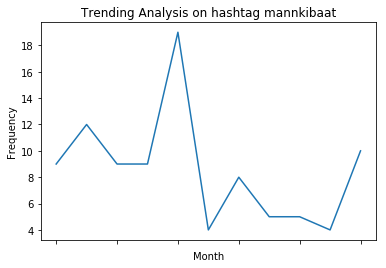

In [162]:
modi.groupby('year_month')['mannkibaat'].sum().plot.line()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Trending Analysis on hashtag mannkibaat')


Text(0.5,1,'Bar analysis on hashtag mannkibaat')

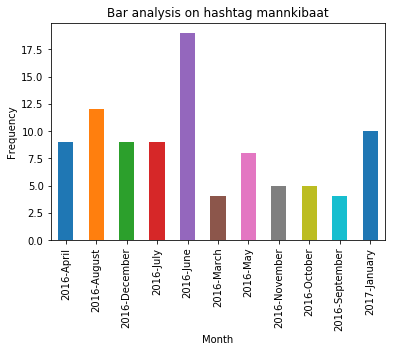

In [163]:
modi.groupby('year_month')['mannkibaat'].sum().plot.bar()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Bar analysis on hashtag mannkibaat')


Text(0.5,1,'Bar analysis on hashtag mannkibaat')

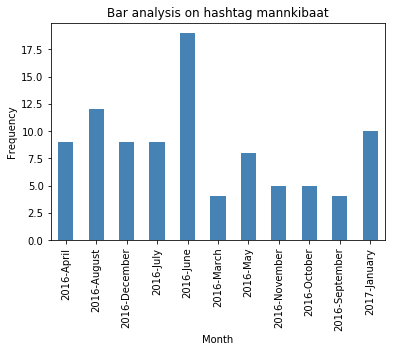

In [172]:
modi.groupby('year_month')['mannkibaat'].sum().plot.bar(color = 'steelblue')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Bar analysis on hashtag mannkibaat')


Text(0.5,1,'Bar analysis on hashtag mannkibaat')

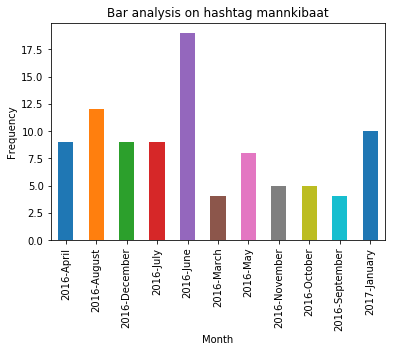

In [173]:
search_term = 'mannkibaat'
modi[search_term] = docs_clean.apply(lambda v: \
                                         1 if search_term in v else 0)
modi.groupby('year_month')['mannkibaat'].sum().plot.bar()
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Bar analysis on hashtag mannkibaat')


# UNSTRUCTURED DATA TO STRUCTURED DATA

## Document Term Matrix

In [174]:
amazon = pd.read_csv('amazon_reviews.csv')

In [176]:
amazon.shape

(999, 10)

In [177]:
amazon.head()

,Unnamed: 0,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,0528881469,"[0, 0]",5.0,We got this GPS for my husband who is an (OTR)...,"06 2, 2013",AO94DHGC771SJ,amazdnu,Gotta have GPS!,1.370131e+09
1,1,0528881469,"[12, 15]",1.0,"I'm a professional OTR truck driver, and I bou...","11 25, 2010",AMO214LNFCEI4,Amazon Customer,Very Disappointed,1.290643e+09
2,2,0528881469,"[43, 45]",3.0,"Well, what can I say. I've had this unit in m...","09 9, 2010",A3N7T0DY83Y4IG,C. A. Freeman,1st impression,1.283990e+09
3,3,0528881469,"[9, 10]",2.0,"Not going to write a long review, even thought...","11 24, 2010",A1H8PY3QHMQQA0,"Dave M. Shaw ""mack dave""","Great grafics, POOR GPS",1.290557e+09
4,4,0528881469,"[0, 0]",1.0,I've had mine for a year and here's what we go...,"09 29, 2011",A24EV6RXELQZ63,Wayne Smith,"Major issues, only excuses for support",1.317254e+09


In [180]:
docs = amazon['reviewText'].fillna('').str.lower().str.replace('[^a-z ]', '')     #NA values
docs.head()

0    we got this gps for my husband who is an otr o...
1    im a professional otr truck driver and i bough...
2    well what can i say  ive had this unit in my t...
3    not going to write a long review even thought ...
4    ive had mine for a year and heres what we got ...
Name: reviewText, dtype: object

In [182]:
docs.head(10)

0    we got this gps for my husband who is an otr o...
1    im a professional otr truck driver and i bough...
2    well what can i say  ive had this unit in my t...
3    not going to write a long review even thought ...
4    ive had mine for a year and heres what we got ...
5    i am using this with a nook hd it works as des...
6    the cable is very wobbly and sometimes disconn...
7    this adaptor is real easy to setup and use rig...
8    this adapter easily connects my nook hd  to my...
9    this product really works great but i found th...
Name: reviewText, dtype: object

In [183]:
def clean_text(row):
    row_words = row.split(' ')
    clean_words = [word for word in row_words if word not in stop_words]
    return ' '.join(clean_words)
docs_clean = docs.apply(clean_text)
docs_clean.head()

0    got gps husband otr road trucker  impressed sh...
1    im professional otr truck driver bought tnd  t...
2    well say  ive unit truck four days  prior garm...
3    going write long review even thought unit dese...
4    ive mine year heres got tries route non truck ...
Name: reviewText, dtype: object

In [184]:
from sklearn.feature_extraction.text import CountVectorizer        
cv = CountVectorizer()
sparse_matrix = cv.fit_transform(docs_clean)   #converting text to dataframe
sparse_matrix

<999x9438 sparse matrix of type '<class 'numpy.int64'>'
	with 55732 stored elements in Compressed Sparse Row format>

CountVectorizer is the keyword to convert unstructured data to structured data

converting text to dataframe :-
1)cv
2)convert to array
3)convert to dataframe as "pd.DataFrame_____"

In [188]:
numpy_matrix = sparse_matrix.toarray()


In [192]:
df_dtm = pd.DataFrame(numpy_matrix)
df_dtm.head()

,0,1,2,3,4,5,6,7,8,9,...,9428,9429,9430,9431,9432,9433,9434,9435,9436,9437
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [194]:
df_dtm = pd.DataFrame(numpy_matrix , columns = cv.get_feature_names())
df_dtm.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [195]:
df_dtm.shape

(999, 9438)

In [196]:
((df_dtm > 0).sum()).sum()

55732

In [197]:
sparse_matrix

<999x9438 sparse matrix of type '<class 'numpy.int64'>'
	with 55732 stored elements in Compressed Sparse Row format>

In [200]:
(df_dtm == 0).head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,False,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [201]:
((df_dtm == 0).sum()).sum()

9372830

In [198]:
(((df_dtm == 0).sum()).sum()) / (df_dtm.shape[0]*df_dtm.shape[1])

0.9940890243920547

close to 99.4% of the values in document term matrix is zero.Hence it is calles as sparse matrix.

## Term Frequency (Column Sum)

In [203]:
df_dtm.sum().sort_values(ascending = False)

nook                1454
books                605
kindle               566
one                  543
screen               475
like                 453
read                 434
great                422
use                  421
get                  393
tv                   380
would                378
tablet               348
good                 331
device               329
bn                   321
also                 317
book                 309
well                 306
reading              280
bought               276
much                 272
mount                270
dont                 270
works                262
card                 257
time                 255
im                   252
price                252
color                249
                    ... 
hospital               1
reviewi                1
hosts                  1
revert                 1
reversible             1
revenge                1
hotmail                1
revealing              1
horizontally           1


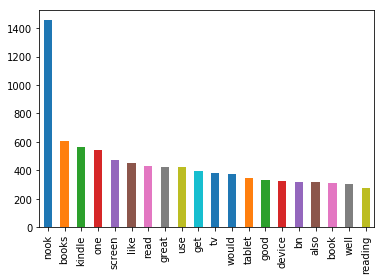

In [204]:
df_dtm.sum().sort_values(ascending = False).head(20).plot(kind = 'bar')

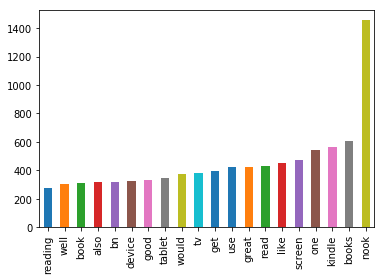

In [206]:
df_dtm.sum().sort_values(ascending = False).head(20)[::-1].plot(kind = 'bar')  #[::-1 ] used to reverse the list

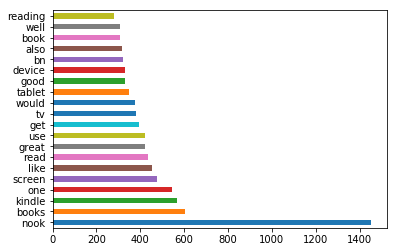

In [207]:
df_dtm.sum().sort_values(ascending = False).head(20).plot(kind = 'barh')   #horizontal

## Identifying biggest documents

In [208]:
df_dtm.sum(axis = 1).sort_values(ascending = False).head(5)

387    1064
273     971
563     766
552     703
248     689
dtype: int64

In [210]:
amazon.loc[386]['reviewText']

"I purchased this for my wife a week ago as an anniversary gift.  I already have a Nook ST and an IPAD2.  It was a very simple setup.  The colors are stunning and the build quality is excellent.  It is not as fast as my IPAD2 but it's no slouch either.  The screen is very responsive to the touch.  The Nook Color is perfect for someone who is looking for a device that is optimized for ebooks yet allows email, web-surfing, and video.  It even does flash which my IPAD2 doesn't.  I probably won't root it because for my wife's purposes it pretty much does everything she needs, but it can be rooted and used as a full fledged Android tablet.  I really like this device.  It is a little on the heavy side for an ereader but it is a great value for $250. I would definitely recommend it to others."

In [213]:
amazon.loc[563]['reviewText'][:20]

'.Paid $[...] for thi'

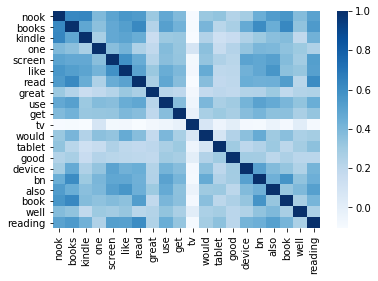

In [216]:
frequent_words = df_dtm.sum().sort_values(ascending=False).head(20).index

words_correlation = df_dtm[frequent_words].corr()
import seaborn as sns
sns.heatmap(words_correlation,cmap = 'Blues')

# WORDS SIMILARITY (Semantic Analysis)

In [217]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity([df_dtm['nook'],df_dtm['tablet']])
cos_sim

array([[1.       , 0.4020679],
       [0.4020679, 1.       ]])

In [219]:
cos_sim = cosine_similarity([df_dtm['tv'],df_dtm['tablet']])
cos_sim

array([[1.        , 0.05096523],
       [0.05096523, 1.        ]])

### 0 to 0.4 cosine similarity is considered as WEAK
### 0.4 to 0.6 cosine similarity is considered as GOOD

In [221]:
cos_sim = cosine_similarity([df_dtm['kindle'],df_dtm['book']])
cos_sim

array([[1.        , 0.43291729],
       [0.43291729, 1.        ]])

In [225]:
cos_sim = pd.DataFrame(cosine_similarity(df_dtm.T),
                      index = df_dtm.columns,
                      columns=df_dtm.columns)
cos_sim                                                                    #converting list to dataframe correlation

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
aaa,1.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
aac,0.0,1.0000,0.0,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
abandoning,0.0,0.0000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
abilities,0.0,0.5000,0.0,1.000000,0.051848,0.032616,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.387298,0.000000,0.0,0.000000
ability,0.0,0.0000,0.0,0.051848,1.000000,0.202930,0.103695,0.000000,0.000000,0.0,...,0.000000,0.119737,0.00000,0.207390,0.000000,0.000000,0.133870,0.207390,0.0,0.073324
able,0.0,0.0000,0.0,0.032616,0.202930,1.000000,0.065233,0.195698,0.000000,0.0,...,0.065233,0.037662,0.00000,0.260931,0.130466,0.000000,0.168430,0.260931,0.0,0.000000
abnormally,0.0,0.0000,0.0,0.000000,0.103695,0.065233,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
aboutdo,0.0,0.0000,0.0,0.000000,0.000000,0.195698,0.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
aboutif,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
absence,0.0,0.0000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [231]:
cos_sim.head()

,aaa,aac,abandoning,abilities,ability,able,abnormally,aboutdo,aboutif,absence,...,zillions,zip,zippered,zippier,zippy,zirco,zoom,zooming,zooms,zune
aaa,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
aac,0.0,1.0,0.0,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abandoning,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.0,0.000000
abilities,0.0,0.5,0.0,1.000000,0.051848,0.032616,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.0,0.0,0.387298,0.00000,0.0,0.000000
ability,0.0,0.0,0.0,0.051848,1.000000,0.202930,0.103695,0.0,0.0,0.0,...,0.0,0.119737,0.0,0.20739,0.0,0.0,0.133870,0.20739,0.0,0.073324


## single word correlated values

In [228]:
def get_similar_words(word,cos_sim):
    cos_sim_word = cos_sim[word].sort_values(ascending=False).drop(word).head(5).index.values
    return list(cos_sim_word)
get_similar_words('book',cos_sim)

['books', 'nook', 'bn', 'read', 'want']

In [229]:
def get_similar_words(word,cos_sim):
    cos_sim_word = cos_sim[word].sort_values(ascending=False).drop(word).head(5).index.values
    return list(cos_sim_word)
get_similar_words('tablet',cos_sim)

['apps', 'character', 'android', 'tablets', 'designed']

In [230]:
def get_similar_words(word,cos_sim):
    cos_sim_word = cos_sim[word].sort_values(ascending=False).drop(word).head(5).index.values
    return list(cos_sim_word)
get_similar_words('touch',cos_sim)

['screen', 'kindle', 'page', 'books', 'nook']

## Bigrams = for 2 words

In [234]:
cv = CountVectorizer(ngram_range = (2,2))   #minimun 2 and maximum 2
sparse_matrix = cv.fit_transform(docs_clean)   #converting text to dataframe
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns = cv.get_feature_names())
df_dtm.shape

(999, 57437)

In [236]:
df_dtm.head()

,aaa batteries,aac soundtracks,abandoning normal,abilities aware,abilities full,abilities screen,abilities stripped,ability add,ability borrow,ability box,...,zoom rotate,zoom text,zoom type,zoom use,zooming awkward,zooming features,zooming scrolling,zooms touch,zune ive,zune place
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Trigrams = for 3 words

In [237]:
cv = CountVectorizer(ngram_range = (3,3))   #minimun 2 and maximum 2
sparse_matrix = cv.fit_transform(docs_clean)   #converting text to dataframe
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns = cv.get_feature_names())
df_dtm.shape

(999, 68851)

In [238]:
df_dtm.head()

,aaa batteries clip,aac soundtracks latter,abandoning normal principal,abilities aware eye,abilities full day,abilities screen stock,abilities stripped wont,ability add memory,ability borrow ebooks,ability borrow read,...,zoom rotate purchased,zoom text find,zoom type something,zoom use article,zooming awkward clunky,zooming features picture,zooming scrolling instead,zooms touch screen,zune ive got,zune place original
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Bar Plotting of Bigrams

In [239]:
cv = CountVectorizer(ngram_range = (2,2))   #minimun 2 and maximum 2
sparse_matrix = cv.fit_transform(docs_clean)   #converting text to dataframe
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns = cv.get_feature_names())
df_dtm.shape

(999, 57437)

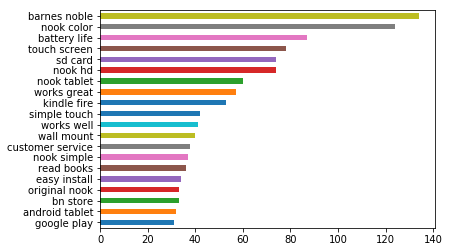

In [240]:
df_dtm.sum().sort_values(ascending = False).head(20)[::-1].plot.barh()

## Bar Plotting of Trigrams

In [241]:
cv = CountVectorizer(ngram_range = (3,3))   #minimun 2 and maximum 2
sparse_matrix = cv.fit_transform(docs_clean)   #converting text to dataframe
numpy_matrix = sparse_matrix.toarray()
df_dtm = pd.DataFrame(numpy_matrix, columns = cv.get_feature_names())
df_dtm.shape

(999, 68851)

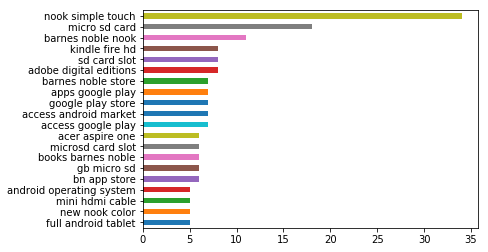

In [242]:
df_dtm.sum().sort_values(ascending = False).head(20)[::-1].plot.barh()